In [1]:
import pickle
import os
import numpy as np
import matplotlib.pyplot as plt
MODEL_DIR = './../../trained_models/dnn'
#MODEL_DIR = './../../trained_models/lstm'

targets = [os.path.join(MODEL_DIR,t) for t in os.listdir(MODEL_DIR)]

In [2]:
train_hist = 'train_hist.pkl'
test_metrics = 'test_metrics.pkl'
tm ={}
th = {}
for t in targets:
    with open(os.path.join(t, train_hist), 'rb') as f:
        # NEEDED FOR lstm MODELS        
        #th[t] = pickle.load(f)[0]
        th[t] = pickle.load(f)
    with open(os.path.join(t, test_metrics), 'rb') as f:
        # NEEDED FOR lstm MODELS
        #tm[t] = pickle.load(f)[0]
        tm[t] = pickle.load(f)


In [3]:
metrics = []
for t, m in tm.items():
    metrics.append(m)
metrics = np.array(metrics)
# removing nan from data
mdat = np.ma.masked_array(metrics,np.isnan(metrics))
avgs = mm = np.mean(mdat,axis=0)
print('Average test loss: {:}, average test accuracy: {:}'.format(avgs[0], avgs[1]))

Average test loss: 0.1477332877025082, average test accuracy: 0.9059060472781716


In [4]:
acc = []
v_acc = []
loss = []
v_loss = []
for t, m in th.items():
    acc.append(m['categorical_accuracy'])
    v_acc.append(m['val_categorical_accuracy'])
    loss.append(m['loss'])
    v_loss.append(m['val_loss'])

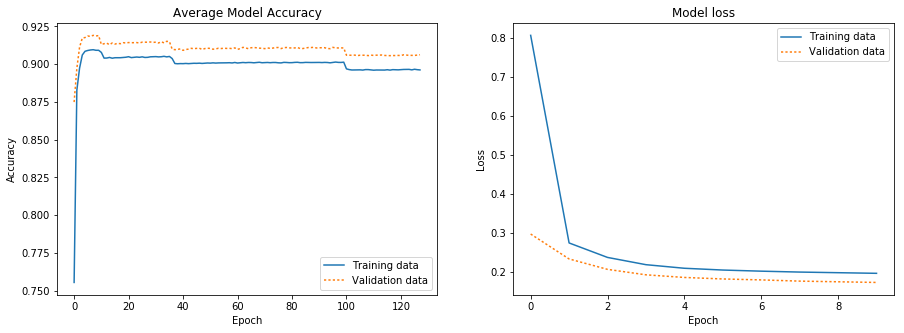

In [5]:
avg_acc = np.mean(acc, axis=0)
avg_val_acc = np.mean(v_acc, axis=0)
avg_loss = np.mean(loss, axis=0)
avg_v_loss = np.mean(v_loss, axis = 0)
plt.figure(figsize=(15, 5))
plt.subplot(121)
#plt.grid()
plt.plot(avg_acc)
plt.plot(avg_val_acc,':')
plt.title('Average Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='lower right')
plt.subplot(122)
#plt.grid()
plt.plot(avg_loss)
plt.plot(avg_v_loss, ':')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training data', 'Validation data'], loc='upper right')
plt.savefig('avg_training_metrics.pdf')
plt.show()